# Week 2 Tutorial: Pandas Basics for Social Impact

Welcome to your second hands-on tutorial! This week, you'll learn how to use Pandas to load, explore, and clean real-world datasets related to social issues.

## Learning Goals
- Load CSV data into Pandas DataFrames
- Explore dataset structure (rows, columns, data types)
- Perform basic data cleaning (handle missing values, rename columns)
- Calculate summary statistics
- Filter and sort data to answer questions
- Connect data analysis to social impact themes

## Part 1: Loading Data with Pandas

Let's start by loading a dataset about global education indicators.

In [0]:
import pandas as pd

# Load the dataset (replace with your file path or use a sample dataset)
df = pd.read_csv("https://ourworldindata.org/grapher/mean-years-of-schooling-long-run.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

In [0]:
df = pd.read_csv('/Volumes/workspace/default/data/mean-years-of-schooling-long-run.csv')

In [0]:
df

,Entity,Code,Year,Average years of schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01
...,...,...,...,...
3694,Zimbabwe,ZWE,2000,7.26
3695,Zimbabwe,ZWE,2005,7.65
3696,Zimbabwe,ZWE,2010,7.86
3697,Zimbabwe,ZWE,2015,8.03


In [0]:
print(f"Loaded dataset with {df.shape[0]:,} rows and {df.shape[1]} columns.")

Loaded dataset with 3,699 rows and 4 columns.


## Part 2: Exploring DataFrame Structure

Let's look at the first few rows and get a sense of the data.

In [0]:
# Preview the data
df.head()

,entity,code,year,mf_youth_and_adults__15_64_years__average_years_of_education
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [0]:
# List columns and data types
print("Columns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Columns: ['entity', 'code', 'year', 'mf_youth_and_adults__15_64_years__average_years_of_education']

Data types:
entity                                                           object
code                                                             object
year                                                              int64
mf_youth_and_adults__15_64_years__average_years_of_education    float64
dtype: object


In [0]:
df['code']

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
3694    ZWE
3695    ZWE
3696    ZWE
3697    ZWE
3698    ZWE
Name: code, Length: 3699, dtype: object

## Part 3: Summary Statistics

Let's calculate some basic statistics to understand the data.

In [0]:
# Summary statistics for numeric columns
df.describe()

,Year,Average years of schooling
count,3699.000000,3699.000000
mean,1946.411192,3.813287
std,45.410017,3.640816
min,1870.000000,0.000000
25%,1905.000000,0.540000
50%,1945.000000,2.760000
75%,1985.000000,6.370000
max,2020.000000,13.740000


In [0]:
# Count unique countries
print("Number of unique countries:", df['Entity'].nunique())

# Count years covered
print("Years covered:", df['Year'].min(), "to", df['Year'].max())

Number of unique countries: 153
Years covered: 1870 to 2020


## Part 4: Data Cleaning

Let's handle missing values and rename columns for clarity.

In [0]:
# Check for missing values
df.isnull().sum()

Entity                          0
Code                          157
Year                            0
Average years of schooling      0
dtype: int64

In [0]:
df[df['Code'].isnull()]

,Entity,Code,Year,Average years of schooling
31,Africa,NaN,1870,0.057632
32,Africa,NaN,1875,0.067937
33,Africa,NaN,1880,0.082982
34,Africa,NaN,1885,0.101042
35,Africa,NaN,1890,0.117637
...,...,...,...,...
3000,South America,NaN,2000,7.443530
3001,South America,NaN,2005,8.177308
3002,South America,NaN,2010,8.695377
3003,South America,NaN,2015,8.554252


In [0]:
# Drop rows with missing mean years of schooling

df_clean = df.dropna(subset=['Code'])

# Rename columns for clarity
df_clean = df_clean.rename(columns={
    'Entity': 'country',
    'Year': 'year',
    'Average years of schooling': 'mean_years_schooling'
})

In [0]:
df_clean.shape

(3542, 4)

## Part 5: Filtering and Sorting Data

Let's answer some questions using filtering and sorting.

In [0]:
# Top 5 countries by mean years of schooling in 2020
top_schooling = df_clean[df_clean['year'] == 2020].sort_values('mean_years_schooling', ascending=False)
top_schooling[['country', 'mean_years_schooling']].head()

,country,mean_years_schooling
1693,Ireland,13.74
3035,South Korea,13.68
1538,Iceland,13.53
3510,United States,13.32
2940,Slovakia,13.14


In [0]:
# Bottom 5 countries by mean years of schooling in 2020
low_schooling = df_clean[df_clean['year'] == 2020].sort_values('mean_years_schooling')
low_schooling[['country', 'mean_years_schooling']].head()

,country,mean_years_schooling
2461,Niger,3.04
2112,Mali,3.55
2273,Mozambique,4.22
3128,Sudan,4.38
2874,Senegal,4.40


## Part 6: Grouping and Aggregation

Let's calculate average literacy by region.

In [0]:
# Group by country and calculate mean years of schooling over all years
country_avg = df_clean.groupby('country')['mean_years_schooling'].mean().sort_values(ascending=False)
country_avg.head()

country
Slovakia     13.085
Singapore    12.800
Lithuania    12.470
Estonia      12.310
Israel       12.040
Name: mean_years_schooling, dtype: float64

In [0]:
# todo: plot a distribution on Average years of schooling to see why median and mean are different

In [0]:
df_clean['mean_years_schooling']

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
3694    7.26
3695    7.65
3696    7.86
3697    8.03
3698    8.32
Name: mean_years_schooling, Length: 3542, dtype: float64

(array([1331.,  444.,  397.,  330.,  249.,  239.,  200.,  169.,  135.,
          48.]),
 array([ 0.   ,  1.374,  2.748,  4.122,  5.496,  6.87 ,  8.244,  9.618,
        10.992, 12.366, 13.74 ]),
 <BarContainer object of 10 artists>)

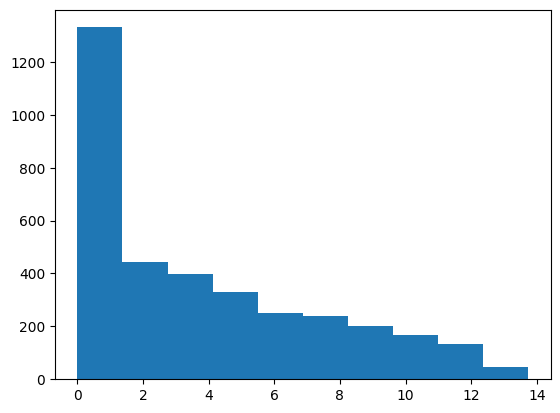

In [0]:
import matplotlib.pyplot as plt
plt.hist(df_clean['mean_years_schooling'])

In [0]:
import plotly.graph_objects as go

mean_val = df_clean['mean_years_schooling'].mean()
median_val = df_clean['mean_years_schooling'].median()

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_clean['mean_years_schooling'],
    nbinsx=30,
    name='Mean Years of Schooling',
    marker_color='lightblue'
))

fig.add_vline(x=mean_val, line_width=2, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=median_val, line_width=2, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top left")

fig.update_layout(
    title="Distribution of Mean Years of Schooling",
    xaxis_title="Mean Years of Schooling",
    yaxis_title="Count",
    showlegend=False
)

fig.show()

## Part 7: Your Turn - Explore and Summarize

Now it's your turn! Try answering these questions:
- What is the average mean years of schooling for the top 10 countries in 2018?
- Which countries have shown the largest increase in mean years of schooling from the earliest to the latest year?
- How has mean years of schooling changed over time for a country of your choice?

Use filtering, sorting, and groupby as shown above.

## Part 8: Simple Functions for Reusable Analysis

Let's create a function to summarize a country's education stats.

In [0]:
def summarize_country(df, country):
    """Prints summary statistics for a given country."""
    data = df[df['country'] == country]
    if data.empty:
        print(f"No data for {country}.")
        return
    print(f"Summary for {country}:")
    print(f"Years covered: {data['year'].min()} - {data['year'].max()}")
    print(f"Average mean years of schooling: {data['mean_years_schooling'].mean():.2f}")
    print(f"Max mean years of schooling: {data['mean_years_schooling'].max():.2f}")
    print(f"Min mean years of schooling: {data['mean_years_schooling'].min():.2f}")

# Try it out
summarize_country(df_clean, "Finland")

## 🎉 Congratulations!

You've completed your first Pandas tutorial for social impact! You've learned:

✅ **Loading data** from CSVs  
✅ **Exploring DataFrames** (rows, columns, types)  
✅ **Cleaning data** (missing values, renaming)  
✅ **Calculating statistics** and answering questions  
✅ **Writing simple functions** for reusable analysis

## 📝 Take-Home Assignment

**Assignment:** Create a notebook that summarizes key statistics of a real dataset related to social impact.

**Requirements:**
1. **Load a provided dataset** about education, health, or development
2. **Explore the data structure** using Pandas methods
3. **Clean the data** by handling missing values and renaming columns
4. **Calculate summary statistics** (mean, median, min, max, counts)
5. **Answer 3 specific questions** about the data using filtering/grouping
6. **Document your findings** with clear explanations

Use the code patterns you learned here as a starting point!

## Next Steps
- Complete the Week 2 assignment
- Upload your notebook to your GitHub repository
- Get ready for Week 3: Data Visualization with Plotly!